In [3]:
!pip install mplfinance

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75.0/75.0 kB 2.5 MB/s eta 0:00:00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
from ipywidgets import interact
import mplfinance as mpf

In [5]:
#LAB 1 : CHARTS BASICS

##  Section A: Line and Scatter Plots

# Questio No. 1 Line Plotting

# Data
x = list(range(1, 15))
y = [i**2 for i in x]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title('Square of Numbers from 1 to 14')
plt.xlabel('Number')
plt.ylabel('Square')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


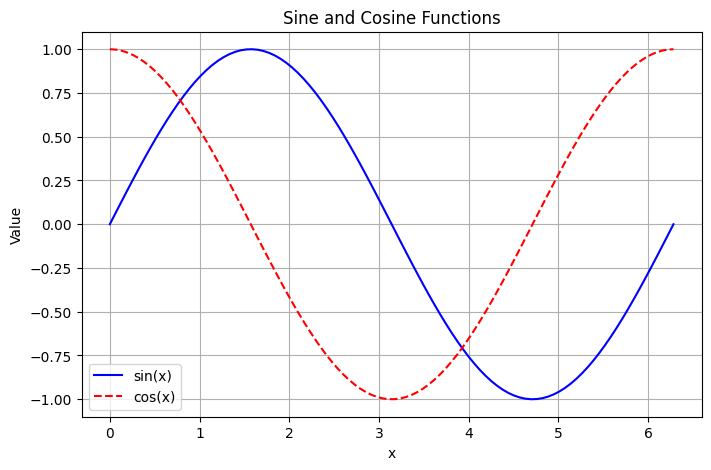

In [6]:
#Question No. 2 Multiple Line Plotting

x = np.linspace(0, 2 * np.pi, 100)
plt.figure(figsize=(8, 5))
plt.plot(x, np.sin(x), label='sin(x)', linestyle='-', color='b')
plt.plot(x, np.cos(x), label='cos(x)', linestyle='--', color='r')
plt.title('Sine and Cosine Functions')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


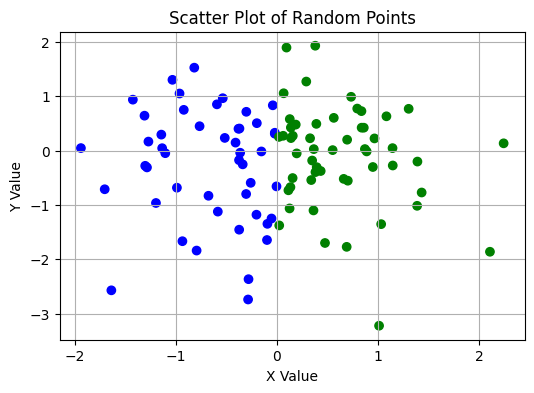

In [7]:
#Question No. 3 **Scatter Plot with Random Data**

x = np.random.randn(100)
y = np.random.randn(100)
colors = ['green' if val > 0 else 'blue' for val in x]
plt.figure(figsize=(6, 4))
plt.scatter(x, y, c=colors)
plt.title('Scatter Plot of Random Points')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.grid(True)
plt.show()


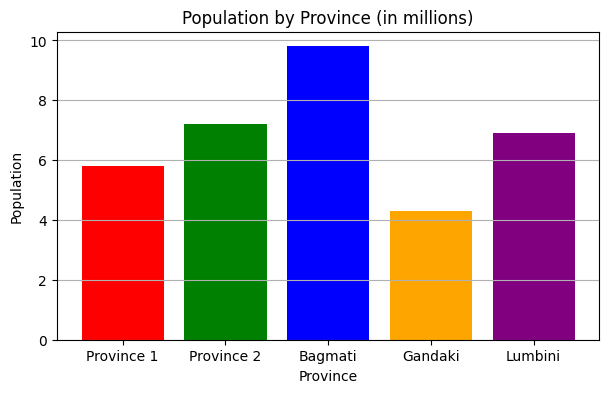

In [8]:

## üìä Section B: Bar and Pie Charts
# Question No. 4 **Bar Plotting**
provinces = ['Province 1', 'Province 2', 'Bagmati', 'Gandaki', 'Lumbini']
populations = [5.8, 7.2, 9.8, 4.3, 6.9]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.figure(figsize=(7, 4))
plt.bar(provinces, populations, color=colors)
plt.title('Population by Province (in millions)')
plt.xlabel('Province')
plt.ylabel('Population')
plt.grid(axis='y')
plt.show()


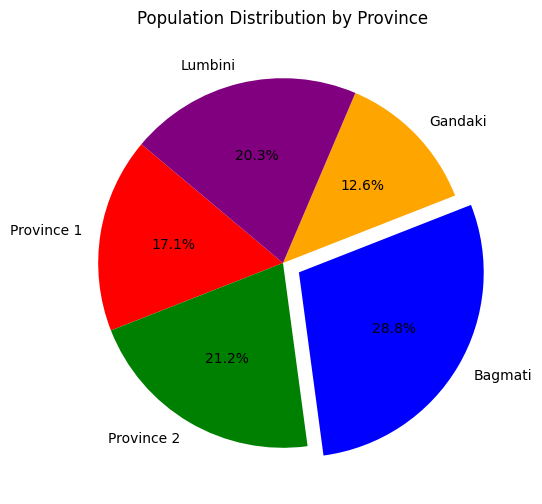

In [9]:
#Question No. 5 PIE CHARTS

# Data
provinces = ['Province 1', 'Province 2', 'Bagmati', 'Gandaki', 'Lumbini']
populations = [5.8, 7.2, 9.8, 4.3, 6.9]
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Explode the largest slice
max_index = populations.index(max(populations))
explode = [0.1 if i == max_index else 0 for i in range(len(populations))]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    populations,
    labels=provinces,
    autopct='%1.1f%%',
    explode=explode,
    colors=colors,
    startangle=140
)
plt.title('Population Distribution by Province')
plt.show()

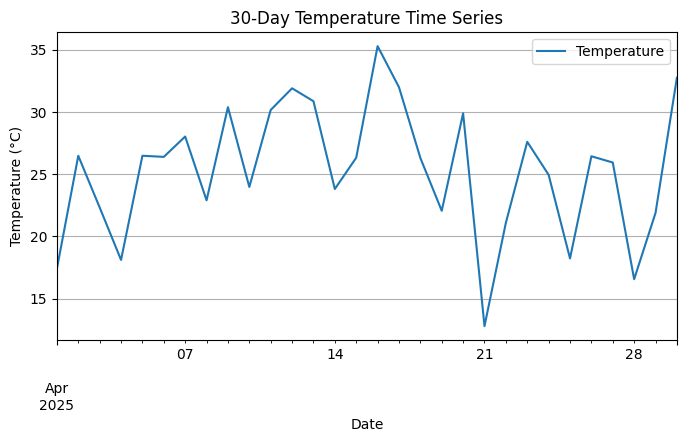

In [10]:
## üìà Section C: Time Series Plotting
# Question No. 6 **Time Series Plotting**

dates = pd.date_range(start='2025-04-01', periods=30)
temps = np.random.normal(loc=25, scale=5, size=30)
df_temp = pd.DataFrame({'Date': dates, 'Temperature': temps})
df_temp.set_index('Date', inplace=True)
df_temp.plot(figsize=(8, 4), title='30-Day Temperature Time Series')
plt.ylabel('Temperature (¬∞C)')
plt.grid(True)
plt.show()


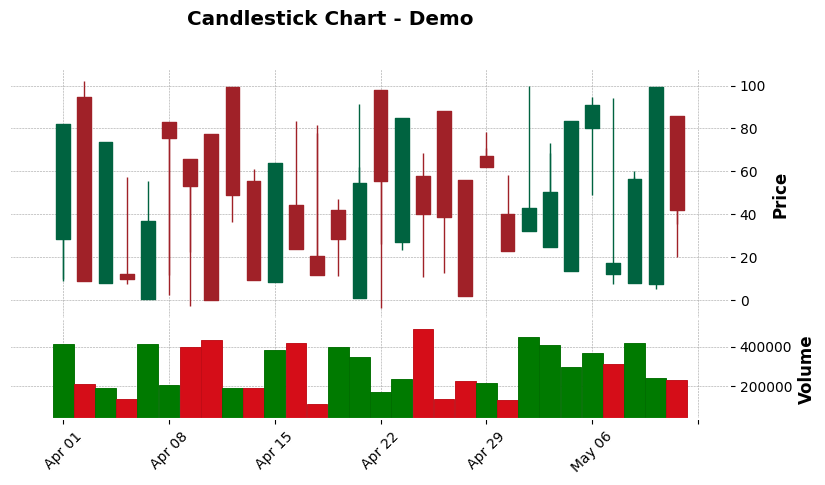

In [12]:
## üß≠ Section D: Candlestick Chart
# Question No. 7  **Candlestick Chart with `mplfinance`**

try:
    dates = pd.date_range('2025-04-01', periods=30, freq='B')  # business days
    data = {
        'Open': np.random.rand(30) * 100,
        'High': np.random.rand(30) * 100 + 5,
        'Low': np.random.rand(30) * 100 - 5,
        'Close': np.random.rand(30) * 100,
        'Volume': np.random.randint(100000, 500000, size=30)
    }
    df_candle = pd.DataFrame(data, index=dates)
    df_candle[['Open', 'High', 'Low', 'Close']] = df_candle[['Open', 'High', 'Low', 'Close']].round(2)
    mpf.plot(df_candle, type='candle', style='charles', title='Candlestick Chart - Demo', figsize=(10, 5), volume=True)
except ModuleNotFoundError:
    print("'mplfinance' not found. Skipping candlestick chart. Install it using `pip install mplfinance`.")

In [22]:
## üéõ Section E: Interactivity
# Question No. 8 **Interactive Function Plotter**

def plot_functions(show_sin, show_cos, show_tan, color):
    x = np.linspace(0, 2 * np.pi, 100)
    plt.figure(figsize=(8, 4))

    if show_sin:
        plt.plot(x, np.sin(x), label='sin(x)', color=color)
    if show_cos:
        plt.plot(x, np.cos(x), label='cos(x)', linestyle='--', color=color)
    if show_tan:
        y = np.tan(x)
        y[np.abs(y) > 10] = np.nan  # Avoid huge spikes
        plt.plot(x, y, label='tan(x)', linestyle=':', color=color)

    plt.ylim(-2, 2)
    plt.title('Interactive Trigonometric Functions')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

# Widgets
interact(
    plot_functions,
    show_sin=widgets.Checkbox(value=True, description='Show sin(x)'),
    show_cos=widgets.Checkbox(value=False, description='Show cos(x)'),
    show_tan=widgets.Checkbox(value=False, description='Show tan(x)'),
    color=widgets.Dropdown(options=['blue', 'red', 'green', 'orange'], value='blue', description='Color')
)

interactive(children=(Checkbox(value=True, description='Show sin(x)'), Checkbox(value=False, description='Show‚Ä¶

<function __main__.plot_functions(show_sin, show_cos, show_tan, color)>